# Notebook for perceptual salience of positive-Self

## Stimulus-coding HDDM for Matching task

This is the script for the drift diffusion model analysis used in Hu, et al., 2019, Notebook for perceptual salience of positive-Self (https://osf.io/83dyj/).


This script decompose the RT and accuracy data into 4 parameters of DDM. The mean of each individual's parameter were then used for analysis of indivdual differences.

The HDDM used here is a docker image run in Ubuntu 20.04. Hardware is the 64-bit machine.

[Install docker](https://docs.docker.com/get-docker/).

Pull the HDDM docker image from the internet ( ~ 5.6 GB)

`docker pull madslupe/hddm`

Run docker (with sudo permission)
`docker run -it --rm \
-v /you_folder_of_data:/home/jovyan/hddm \
-p 8888:8888 madslupe/hddm jupyter notebook`

You will see an url appear in the terminal, right click and open that link, you shall see two folders in the jupyter notebook: `work`, `hddm`. The `hddm` is the folder linked to the folder you stored your data. 

In [1]:
# check which python is in use.
import sys
print('Notebook is running:', sys.executable)

# further check your python version
import sys
print('The current Python version is', sys.version)

# or uncomment the code below

# from platform import python_version

# print(python_version())

# If you are sure that conda is installed, also check the package that install
#!conda list  # list the conda

import hddm, IPython
print('The current HDDM version is', hddm.__version__) # 0.8.0

# Warning:`IPython.parallel` package has been deprecated since IPython 4.0. 
print('The current IPython version is', IPython.__version__) 

Notebook is running: /home/hcp4715/miniconda3/envs/py_ddm/bin/python
The current Python version is 3.7.7 (default, May  7 2020, 21:25:33) 
[GCC 7.3.0]
The current HDDM version is 0.8.0
The current IPython version is 7.13.0


/home/hcp4715/miniconda3/envs/py_ddm/lib/python3.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
%matplotlib inline

# Preparation
import os, hddm, time, csv
import datetime

# import the toolbox
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

# set the color of plots
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmykw')

#nsample = 10000     # number of sampling
#nburn   = 5000      # number of burn

In [5]:
import glob
file_list = glob.glob("*hddm_stim.csv") # get all the file name of input
db_list = glob.glob("*ddm.db")          # get the existing database of models

# Check if the model had been run
db_names = []
for ii in range(0,len(db_list)):
    #print(ii)
    db_names.append(db_list[ii].split('_')[0])
db_names

['df1a',
 'df1a',
 'df1b',
 'df3b',
 'df4a',
 'df4b',
 'df6b',
 'df7a',
 'df7b',
 'df1c',
 'df2',
 'df3a',
 'df5',
 'df6a']

In [4]:
import warnings           # suppress the warnings
warnings.simplefilter('ignore')

for file_name in file_list:
    exp_name = file_name.split('.')[0]           # get the experiment ID
    exp_name = exp_name.split('_')[0]            # get the experiment ID w/o '_' 
    curr_df = hddm.load_csv(file_name)           # load the data
    curr_dbname = exp_name + "_corr" + '_ddm'    # file name for the saving the database
    curr_param_name = exp_name + '_hddm_params.csv'  # file name for saving the parameters
    
    start_time = time.time()  # the start time of the processing
    # sampling
    if exp_name in db_names:     # if the model had been run, skipp
        print(exp_name + ' had been processed\n')
        continue
    
    elif exp_name in ['df1a', 'df1b','df1c', 'df2','df6a']:      # for exp 1a, 1b, 1c, 2, 5, and 6a
        print('current processing: '+ exp_name+ ' (two-way design)')  # print the processing info
        
        curr_M = hddm.HDDMStimCoding(curr_df, 
                                    include='z', 
                                    stim_col='stim', 
                                    depends_on={'v':['match','val'], 't':['match','val'],'a':['match','val']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=.05)

        curr_M.find_starting_values()
        curr_M.sample(nsample, burn=nburn, dbname=curr_dbname+ '.db', db='pickle')
   
    elif exp_name in ['df5']:      # for exp 5
        print('current processing: '+ exp_name+ ' (domain specific)')  # print the processing info 
        curr_M = hddm.HDDMStimCoding(curr_df, 
                                    include='z', 
                                    stim_col='stim', 
                                    depends_on={'v':['match','val','domain'], 't':['match','val','domain'],'a':['match','val','domain']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=.05)

        curr_M.find_starting_values()
        curr_M.sample(nsample, burn=nburn, dbname=curr_dbname+ '.db', db='pickle')
   
    else:
        print('current processing: '+ exp_name + ' (three-way design)')
        curr_M = hddm.HDDMStimCoding(curr_df, 
                                    include='z', 
                                    stim_col='stim', 
                                    depends_on={'v':['match','val','id'], 't':['match','val','id'],'a':['match','val','id']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=.05)

        curr_M.find_starting_values()
        curr_M.sample(nsample, burn=nburn, dbname=curr_dbname+ '.db', db='pickle')
   
        
    ## print the time used for modelling
    m1_time = time.time() # the time when the script runs to here
    # save the model
    curr_M.save(curr_dbname)

    print("\nRunning Model of " + exp_name + " used: %f seconds." % (m1_time - start_time))

    ## print DIC
    print("current model DIC: %f\n" % curr_M.dic)  #
     
    # get the individual node
    subj_Data = curr_M.get_subj_nodes()
    #subj_Data.head()
    subj_Data.to_csv(curr_param_name)
    

df1a had been processed

df1b had been processed

df1c had been processed

df2 had been processed

df3a had been processed

df3b had been processed

df4a had been processed

df4b had been processed

current processing: df5 (domain specific)
 [-----------------100%-----------------] 10001 of 10000 complete in 18725.8 sec
Running Model of df5 used: 19319.454000 seconds.
current model DIC: -10497.194281

current processing: df6a (two-way design)
 [-----------------100%-----------------] 10000 of 10000 complete in 5046.2 sec
Running Model of df6a used: 5116.275000 seconds.
current model DIC: -22871.331647

df6b had been processed

df7a had been processed

df7b had been processed



## Experiment 1a

In [3]:
# define a function to run model in parallel
def run_model(id):
    import hddm
    data = hddm.load_csv('mydata.csv')
    
    m = hddm.HDDM(data)
    m.find_starting_value()
    m.sample(5000, burn=20, dbname='db%i'%id, db='pickle')
    
    return m

In [4]:
# load data
df1a_v_corr = hddm.load_csv('df1a.v.hddm_stim.csv')

df1a_v_corr.head(10)  # uncomment if you want to check the head of the data

# Uncomment the codes below if you are interested in checking the distribution of raw data
# plot and save the distribution of raw data:
#fig = plt.figure()
#ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
#for i, subj_data in df1a_v_corr.groupby('subj_idx'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('plot_MS_dat_M_match.pdf')

,subj_idx,match,val,stim,response,rt
0,1001,Match,Bad,1,1,0.495
1,1001,Match,Bad,1,0,0.991
2,1001,Mismatch,Bad,0,1,0.704
3,1001,Match,Neutral,1,1,1.016
4,1001,Mismatch,Good,0,0,0.865
5,1001,Match,Good,1,1,1.049
6,1001,Match,Neutral,1,0,0.817
7,1001,Match,Good,1,1,0.865
8,1001,Mismatch,Bad,0,0,1.065
9,1001,Match,Neutral,1,1,0.953


In [5]:
nsample = 5000     # number of sampling
nburn   = 2000      # number of burn

# dateToday = str(date.today())  # replace the code below if you prefer using the actual date
dateToday = 'test_py37' # using final in the saved file name
dbname = "df1a_v_corr_" + dateToday + '.ddm'

In [1]:

#-------------------------------
# Watcher function - function for dynamically printing ipython parallel output 
# adapted from the following two sources:
# http://stackoverflow.com/questions/18086299/real-time-output-from-engines-in-ipython-parallel
# http://stackoverflow.com/questions/15289168/printing-to-stdout-in-ipython-parallel-processes
#-------------------------------       
import sys
import time
from IPython.display import clear_output

def wait_watching_stdout(ar, dt=10):
    ## ar: vmap output of the models being run
    ## dt: number of seconds between checking output
    while not ar.ready():
        stdouts = ar.stdout
        if not any(stdouts):
            continue
        # clear_output doesn't do much in terminal environments
        clear_output()
        print('-' * 30)
        print("%.3fs elapsed" % ar.elapsed)
        print("")
        for out in ar.stdout: print(out);
        sys.stdout.flush()
        time.sleep(dt)

In [6]:
# define a function to run model in parallel
def run_model(id):
    print('running model%i'%id);
    import hddm
    dbname='df1a_db_chain_%i'%id

    data = hddm.load_csv('df1a.v.hddm_stim.csv')
    
    m = hddm.HDDMStimCoding(data,
                            include='z', 
                            stim_col='stim', 
                            depends_on={'v':['match','val'], 't':['match','val'],'a':['match','val']},
                            split_param='v', 
                            drift_criterion=False)
    m.find_starting_values()
    m.sample(5000, burn=2000, dbname=dbname, db='pickle')
    m.save(dbname)
    return m

In [ ]:
from ipyparallel import Client
start_time = time.time()  # the start time of the processing
v = Client()[:]
jobs = v.map(run_model, range(4)) # 4 is the number of CPUs
# wait_watching_stdout(jobs)
models = jobs.get()

m1_time = time.time() 
print("\nRunning 4 chains used: %f seconds." % (m1_time - start_time))

Exception in callback BaseAsyncIOLoop._handle_events(46, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(46, 1)>
Traceback (most recent call last):
  File "/home/hcp4715/miniconda3/envs/py_ddm/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/home/hcp4715/miniconda3/envs/py_ddm/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 139, in _handle_events
    handler_func(fileobj, events)
  File "/home/hcp4715/miniconda3/envs/py_ddm/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 456, in _handle_events
    self._handle_recv()
  File "/home/hcp4715/miniconda3/envs/py_ddm/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 486, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/hcp4715/miniconda3/envs/py_ddm/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 438, in _run_callback
    callback(*args, **kwargs)
  File "<decorator-gen-153>", line 2, in _dispatch_reply
  

In [ ]:
print("\nRunning 4 chains used: %f seconds." % (m1_time - start_time))

In [ ]:
combined_model = kabuki.utils.concat_models(models)

#### Experiment 1a: free v, a, t, z

In [8]:
start_time = time.time()  # the start time of the processing
 
import warnings           # suppress the warnings
warnings.simplefilter('ignore')

M_df1a_v_corr = hddm.HDDMStimCoding(df1a_v_corr, 
                                    include='z', 
                                    stim_col='stim', 
                                    depends_on={'v':['match','val'], 't':['match','val'],'a':['match','val']},
                                    split_param='v', 
                                    drift_criterion=False)

M_df1a_v_corr.find_starting_values()
M_df1a_v_corr.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_df1a_v_corr.save(dbname)

# M_df1a_v_corr = hddm.load(dbname) # if you already saved the model, you can load it with this code.

## print the time used for modelling
m1_time = time.time() # the time when the script runs to here

print("Running M1 used: %f seconds" % (m1_time - start_time))

## print DIC
print("M_df1a_v_corr DIC: %f" % M_df1a_v_corr.dic)  # －7043

 [-                 3%                  ] 180 of 5000 complete in 269.9 secHalting at iteration  179  of  5000
Could not generate output statistics for z_subj.1051
Could not generate output statistics for a_subj(Mismatch.Neutral).1004
Could not generate output statistics for t_subj(Match.Bad).1075
Could not generate output statistics for a_subj(Mismatch.Bad).1010
Could not generate output statistics for a_subj(Match.Neutral).1003
Could not generate output statistics for v(Match.Bad)
Could not generate output statistics for z_subj.1070
Could not generate output statistics for z_subj.1071
Could not generate output statistics for v_subj(Mismatch.Neutral).1032
Could not generate output statistics for a_subj(Mismatch.Good).1005
Could not generate output statistics for t_subj(Match.Neutral).1075
Could not generate output statistics for a_subj(Match.Bad).1004
Could not generate output statistics for a_subj(Match.Good).1003
Could not generate output statistics for a_subj(Match.Good).1005
Could

TypeError: 'NoneType' object is not subscriptable

In [9]:
M_df1a_v_corr = hddm.load(dbname) # load the data

Could not generate output statistics for a_subj(Match.Good).1063
Could not generate output statistics for v_subj(Match.Good).1001
Could not generate output statistics for a_subj(Match.Neutral).1031
Could not generate output statistics for a_subj(Match.Neutral).1061
Could not generate output statistics for a_subj(Match.Good).1062
Could not generate output statistics for z_subj_trans.1012
Could not generate output statistics for a_subj(Match.Good).1010
Could not generate output statistics for a_subj(Match.Bad).1062
Could not generate output statistics for z_subj.1004
Could not generate output statistics for a_subj(Match.Good).1001
Could not generate output statistics for a_subj(Match.Bad).1010
Could not generate output statistics for t_subj(Match.Good).1001
Could not generate output statistics for a_subj(Match.Bad).1021
Could not generate output statistics for a_subj(Match.Bad).1032
Could not generate output statistics for a_subj(Match.Good).1061
Could not generate output statistics for 

TypeError: 'NoneType' object is not subscriptable

Plotting a(Match.Bad)
Plotting a(Match.Good)
Plotting a(Match.Neutral)
Plotting a(Mismatch.Bad)
Plotting a(Mismatch.Good)
Plotting a(Mismatch.Neutral)
Plotting a_std
Plotting v(Match.Bad)
Plotting v(Match.Good)
Plotting v(Match.Neutral)
Plotting v(Mismatch.Bad)
Plotting v(Mismatch.Good)
Plotting v(Mismatch.Neutral)
Plotting v_std
Plotting t(Match.Bad)
Plotting t(Match.Good)
Plotting t(Match.Neutral)
Plotting t(Mismatch.Bad)
Plotting t(Mismatch.Good)
Plotting t(Mismatch.Neutral)
Plotting t_std
Plotting z
Plotting z_std


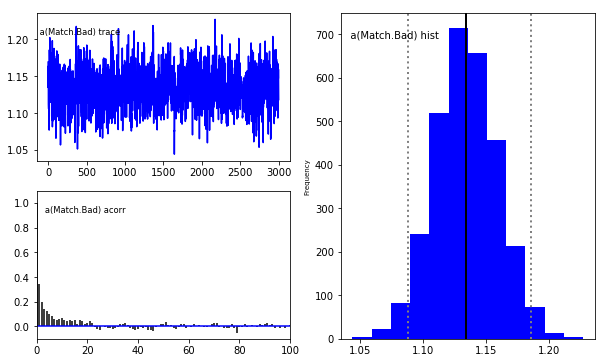

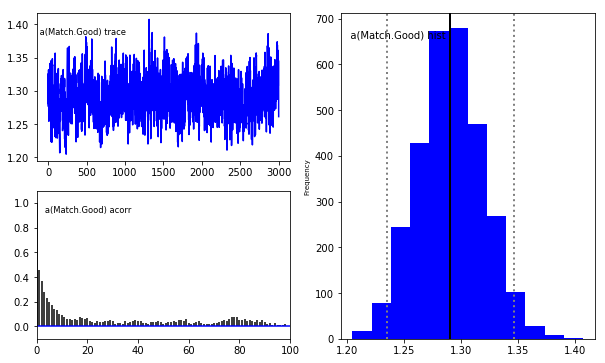

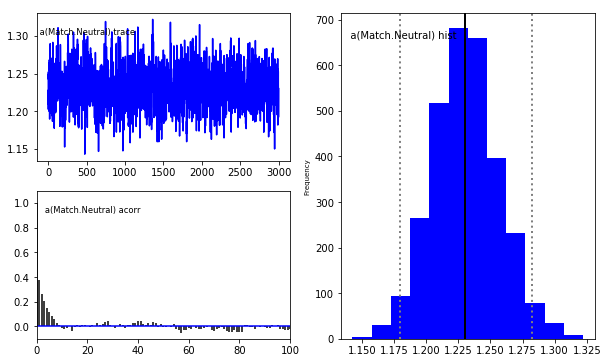

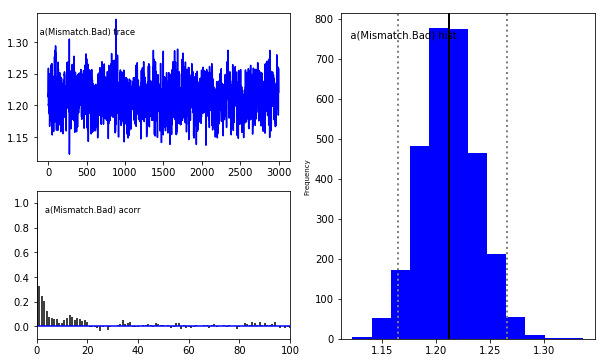

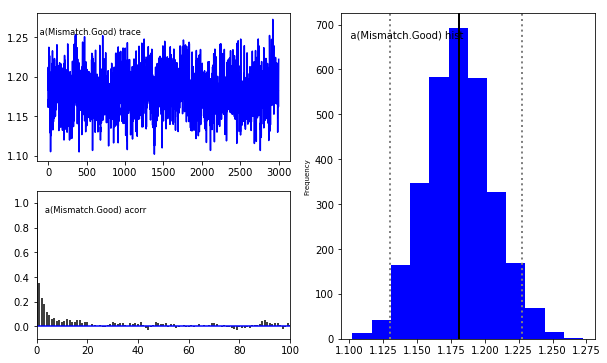

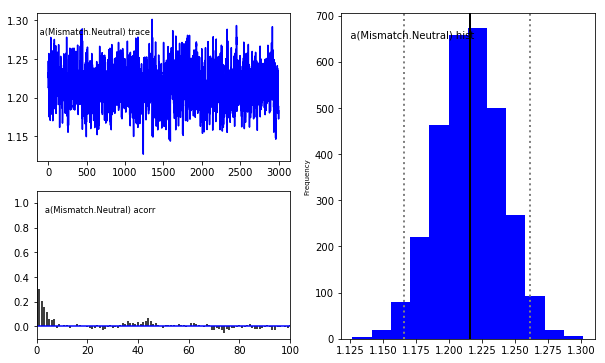

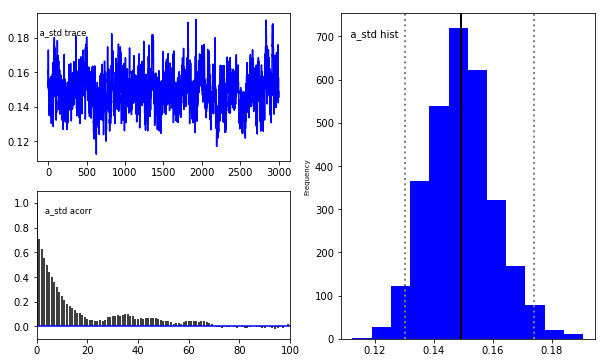

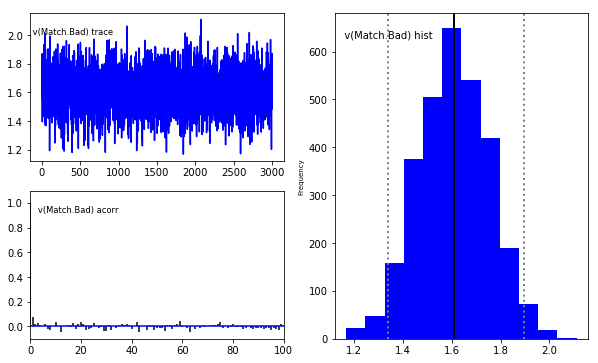

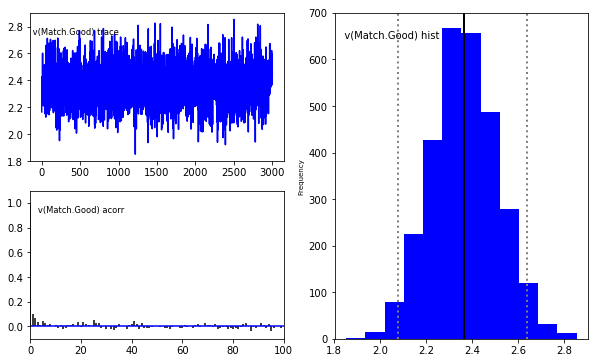

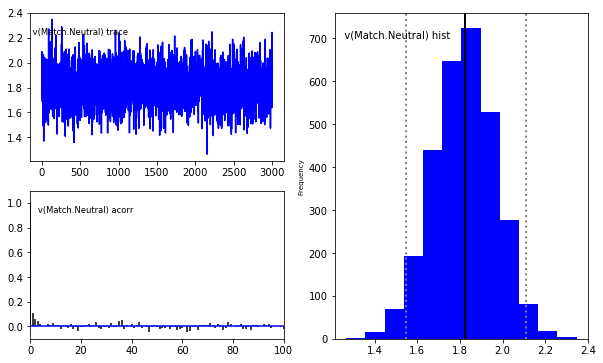

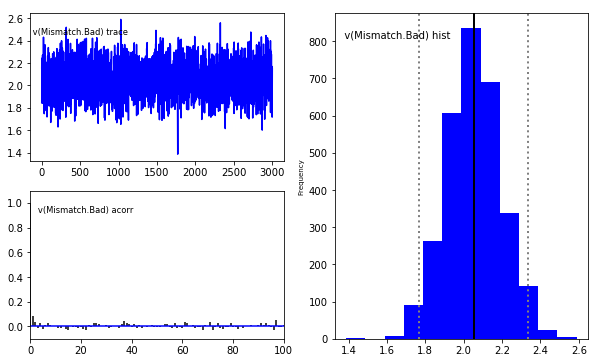

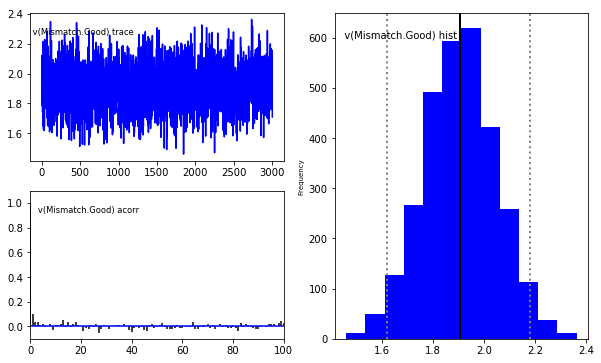

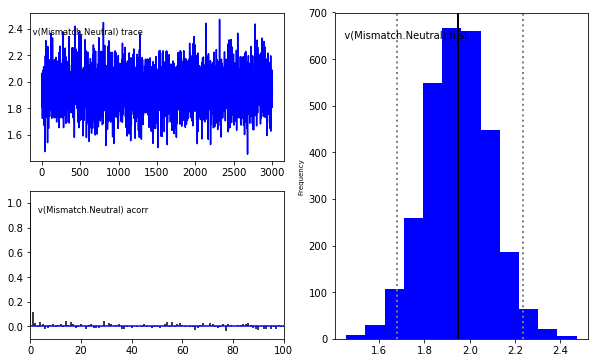

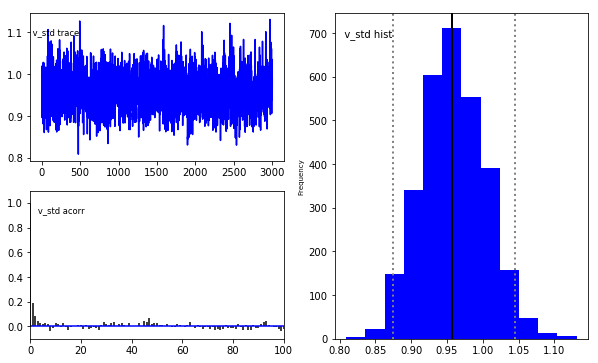

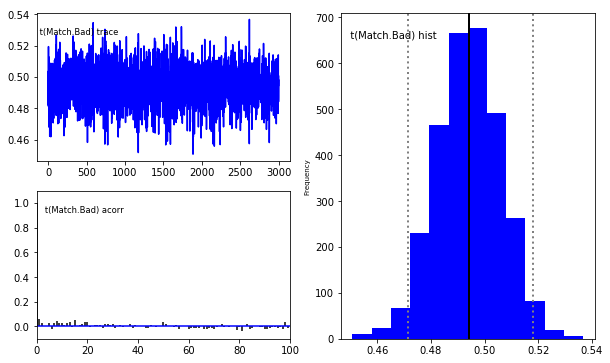

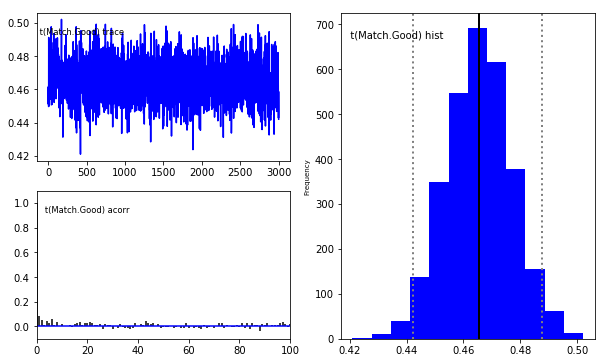

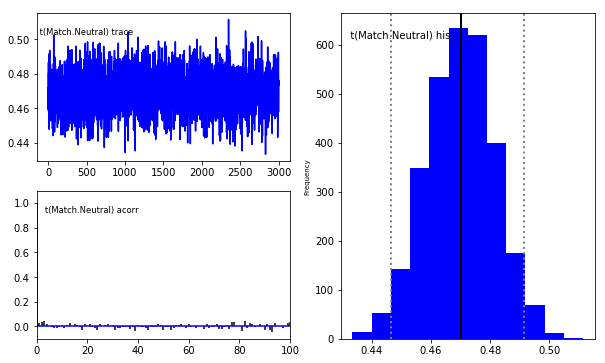

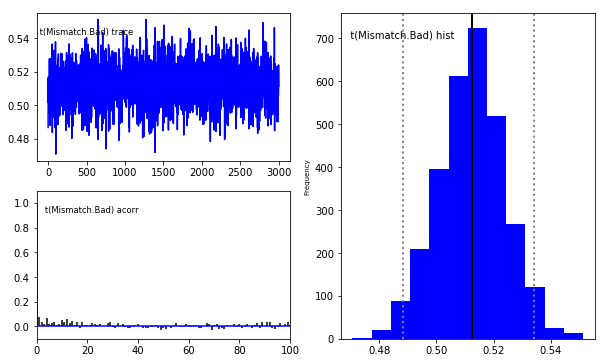

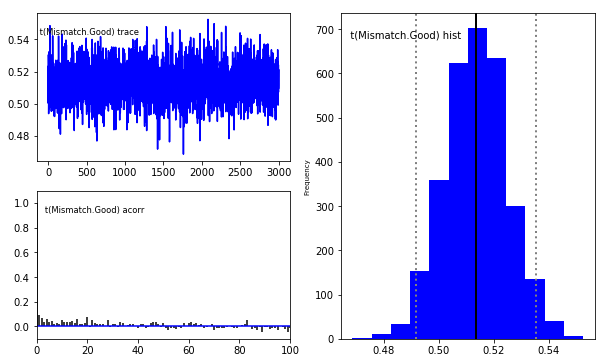

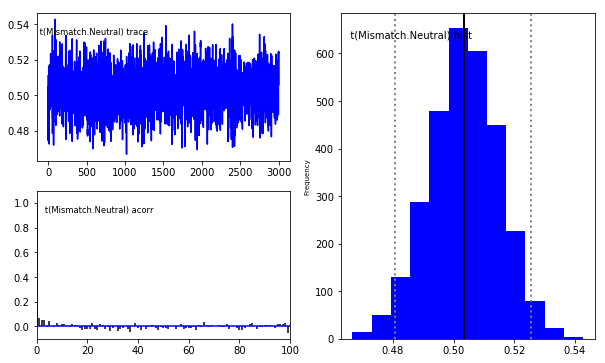

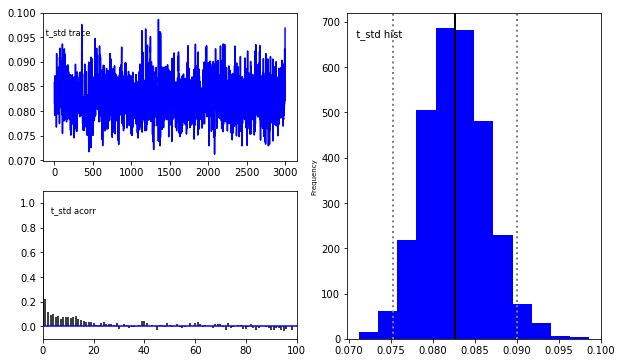

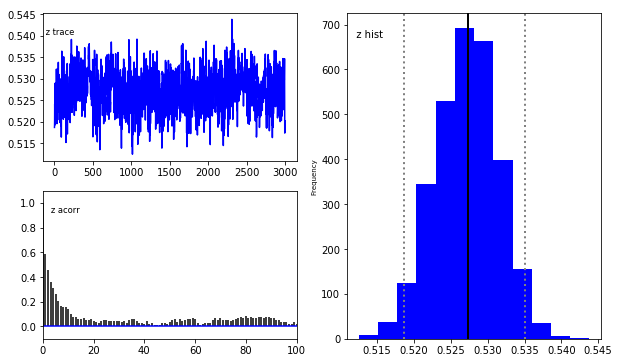

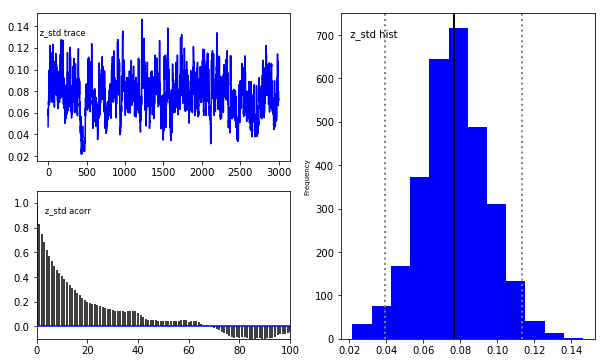

In [11]:
## check convergence of this Chain
M_df1a_v_corr.plot_posteriors()

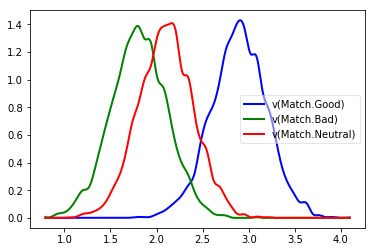

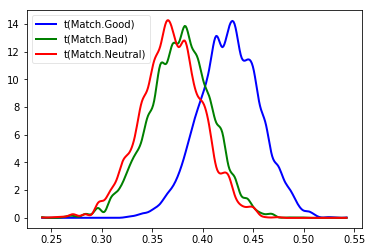

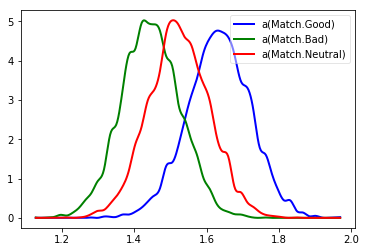

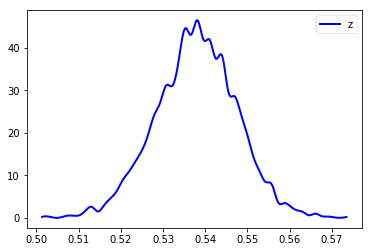

In [7]:
## drift rate
v_Good, v_Bad, v_neutral = M_df1a_v_corr.nodes_db.node[['v(Match.Good)','v(Match.Bad)','v(Match.Neutral)']]
hddm.analyze.plot_posterior_nodes([v_Good,v_Bad, v_neutral])
#plt.savefig('ex7_rep_match_vtz_s_v3_m.pdf')

#hddm.analyze.plot_posterior_nodes([v_GoodSelf_val_nm,v_BadSelf_val_nm, v_GoodOther_val_nm, v_BadOther_val_nm])
#plt.savefig('ex7_rep_match_vtz_s_v3_nm.pdf')

## non-decision time
t_Good, t_Bad, t_neutral = M_df1a_v_corr.nodes_db.node[['t(Match.Good)','t(Match.Bad)','t(Match.Neutral)']]
hddm.analyze.plot_posterior_nodes([t_Good,t_Bad, t_neutral])
#plt.savefig('ex7_rep_match_vtz_s_t_3_m.pdf')

## boundary
a_Good, a_Bad, a_neutral = M_df1a_v_corr.nodes_db.node[['a(Match.Good)','a(Match.Bad)','a(Match.Neutral)']]
hddm.analyze.plot_posterior_nodes([a_Good,a_Bad, a_neutral])


## starting point
z_m = M_df1a_v_corr.nodes_db.node['z']
hddm.analyze.plot_posterior_nodes([z_m])
#plt.savefig('ex7_rep_match_vtz_z_match_plot.pdf')

In [30]:
# get the individual node
subj_Data = M_df1a_v_corr.get_subj_nodes()
#subj_Data.head()
subj_Data.to_csv(r'exp1a_hddm_params.csv')

Check the model fitting using PPC and DIC:

In [7]:
start_time = time.time()  # the start time of the processing

## calculate the posterior preditive check (ppc)
ppc_data_match_vtz_s = hddm.utils.post_pred_gen(M_match_vtz_s)
ppc_compare_match_vtz_s = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_vtz_s)  # MSE 
ppc_compare_match_vtz_s.to_csv('ppc_compare_match_vtz_s.csv', sep = ',')

#M_Categ_val_vtz_s.plot_posterior_predictive()  # plot the posterior predictive for each condition of each subject.

## plot the posterior for each condition
# M_match_vatz.plot_posterior_quantiles()
# M_match_vatz.plot_posteriors_conditions()
# M_match_vatz_data =  M_match_vatz.gen_stats

## print the time used for modelling
m1_time = time.time() # the start time of the processing
print("Running PPC of M1 used: %f seconds" % (m1_time - start_time))

 [-----------------100%-----------------] 339 of 336 complete in 4664.7 secRunning PPC of M1 used: 5096.700998 seconds


In [3]:
# load data
df1b_v_corr = hddm.load_csv('df1b.v.hddm_stim.csv')

nsample = 10000     # number of sampling
nburn   = 3000      # number of burn

# dateToday = str(date.today())  # replace the code below if you prefer using the actual date
dateToday = 'final' # using final in the saved file name
dbname = "df1b_v_corr_" + dateToday + '.ddm'

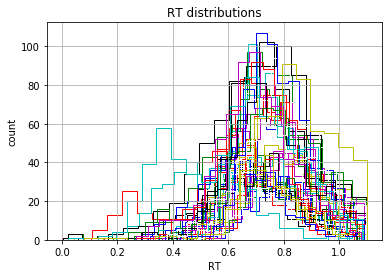

In [5]:
# plot and save the distribution of raw data:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in df1b_v_corr.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)


In [6]:
start_time = time.time()  # the start time of the processing
 
import warnings           # suppress the warnings
warnings.simplefilter('ignore')

M_df1b_v_corr = hddm.HDDMStimCoding(df1b_v_corr, 
                                    include='z', 
                                    stim_col='stim', 
                                    depends_on={'v':['match','val'], 't':['match','val'],'a':['match','val']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=.05)

M_df1b_v_corr.find_starting_values()
M_df1b_v_corr.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle',)
   
# save the model
M_df1b_v_corr.save(dbname)

# M_df1a_v_corr = hddm.load(dbname) # if you already saved the model, you can load it with this code.

## print the time used for modelling
m1_time = time.time() # the time when the script runs to here

print("Running M1 used: %f seconds" % (m1_time - start_time))

## print DIC
print("M_df1b_v_corr DIC: %f" % M_df1b_v_corr.dic)  # 

 [-----------------100%-----------------] 10001 of 10000 complete in 5946.9 secRunning M1 used: 6023.765000 seconds
M_df1b_v_corr DIC: 2491.590251


Plotting a(Match.Bad)
Plotting a(Match.Good)
Plotting a(Match.Neutral)
Plotting a(Mismatch.Bad)
Plotting a(Mismatch.Good)
Plotting a(Mismatch.Neutral)
Plotting a_std
Plotting v(Match.Bad)
Plotting v(Match.Good)
Plotting v(Match.Neutral)
Plotting v(Mismatch.Bad)
Plotting v(Mismatch.Good)
Plotting v(Mismatch.Neutral)
Plotting v_std
Plotting t(Match.Bad)
Plotting t(Match.Good)
Plotting t(Match.Neutral)
Plotting t(Mismatch.Bad)
Plotting t(Mismatch.Good)
Plotting t(Mismatch.Neutral)
Plotting t_std
Plotting z
Plotting z_std


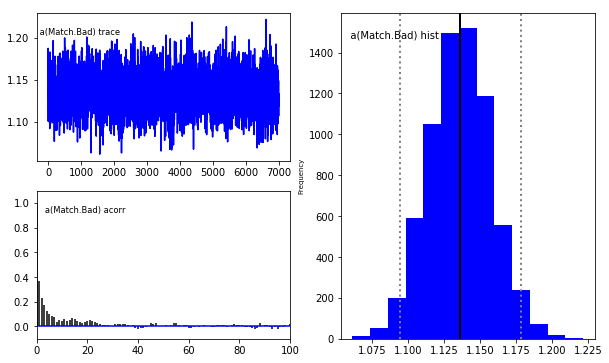

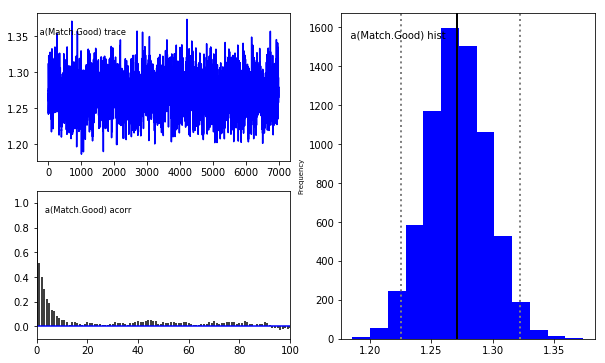

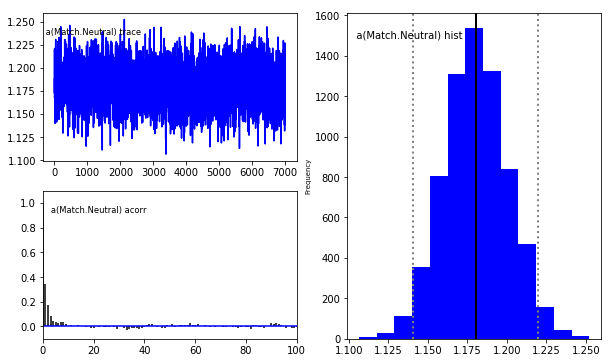

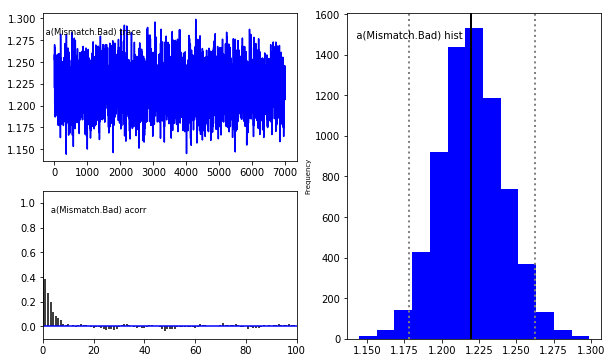

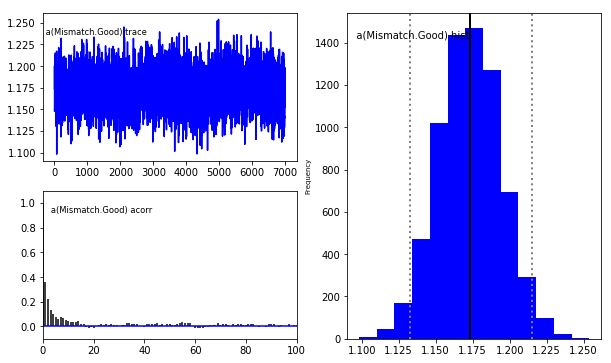

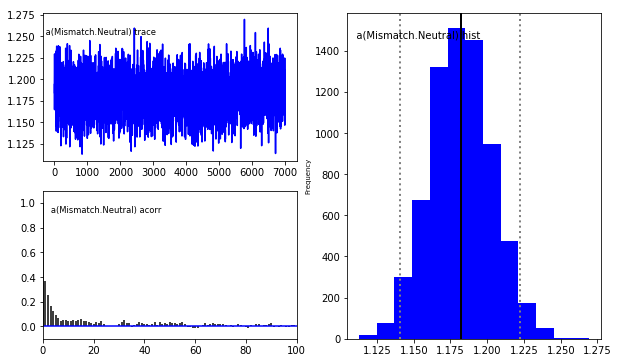

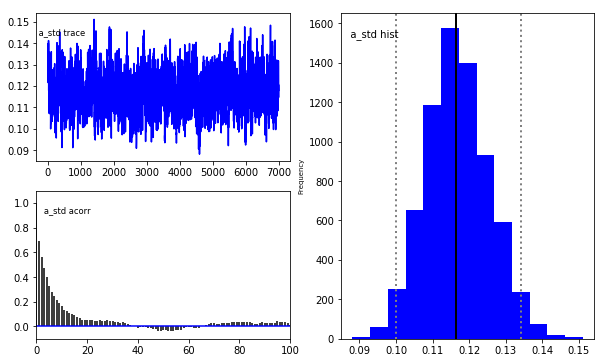

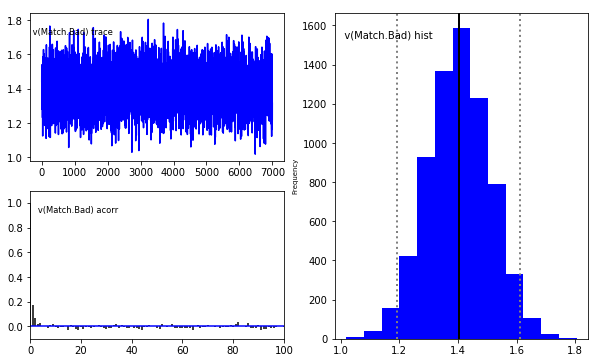

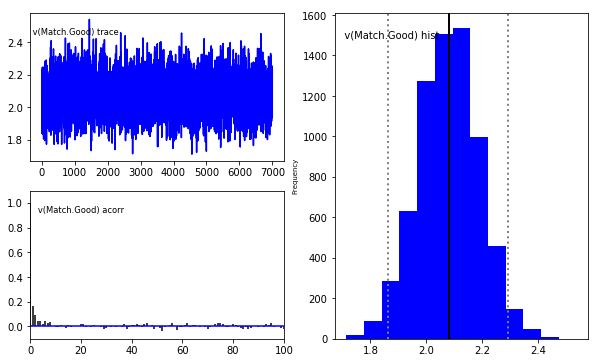

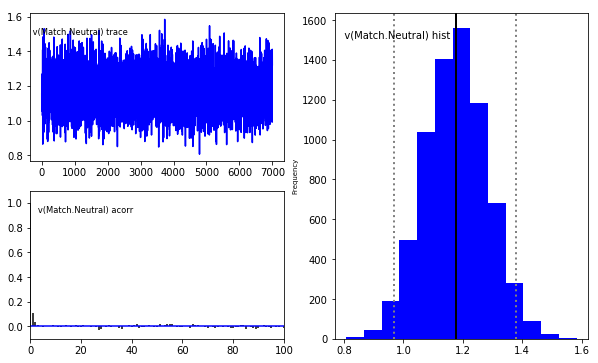

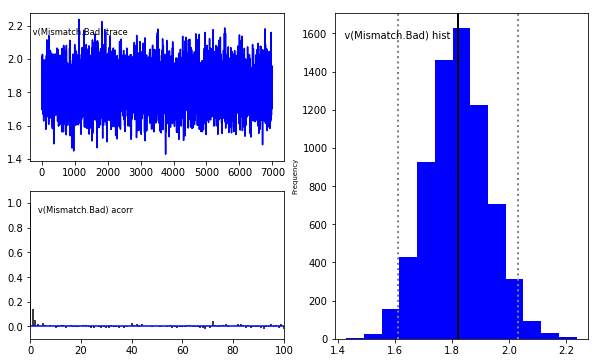

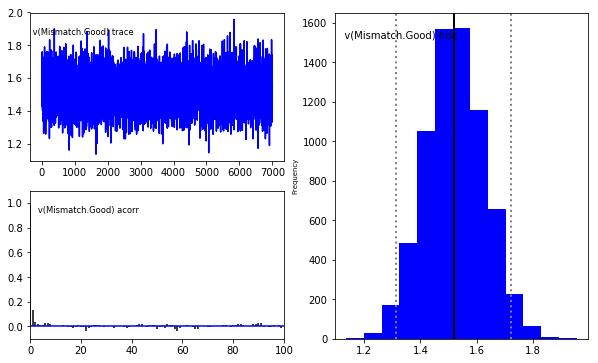

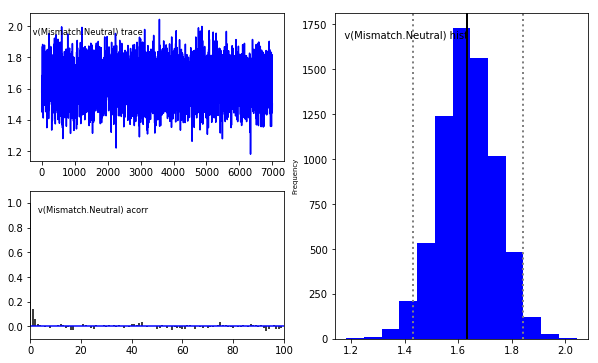

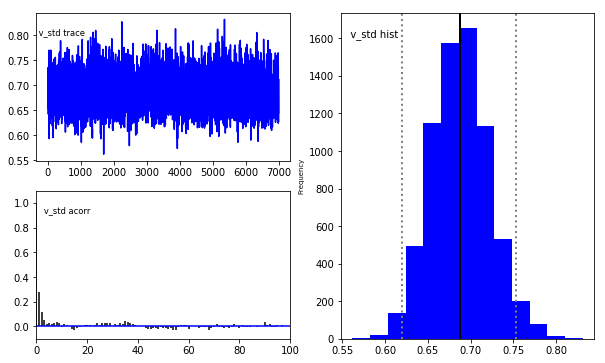

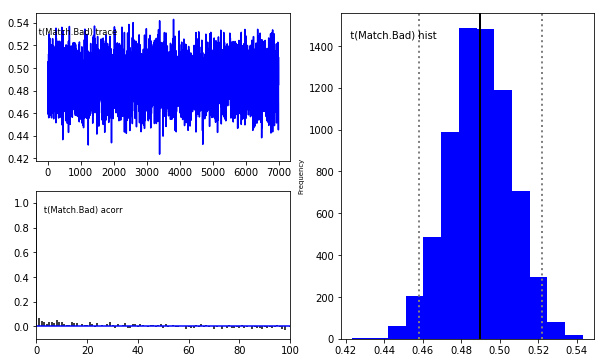

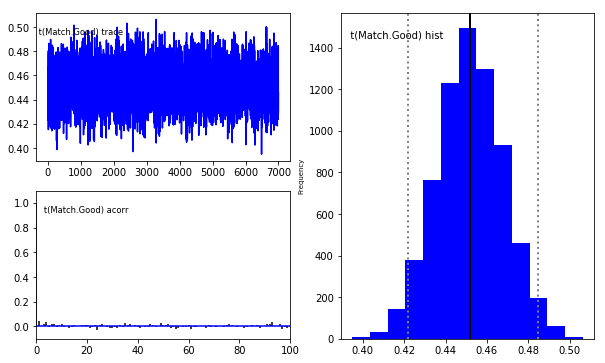

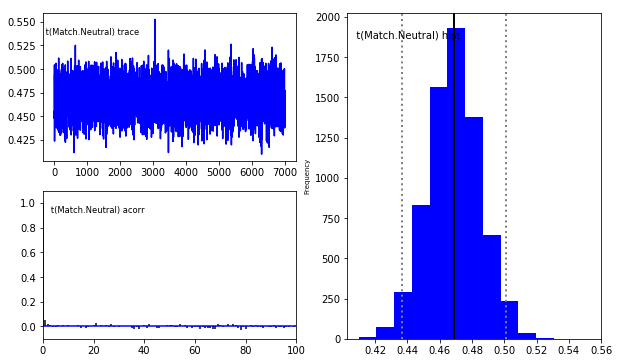

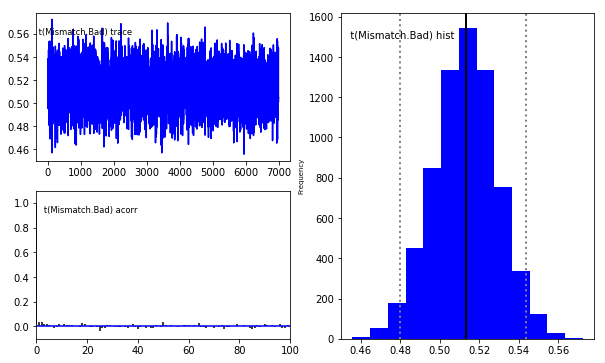

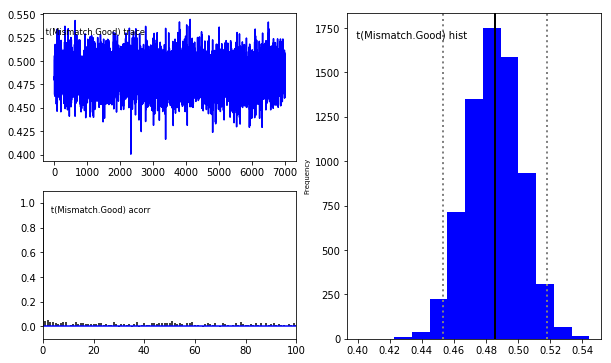

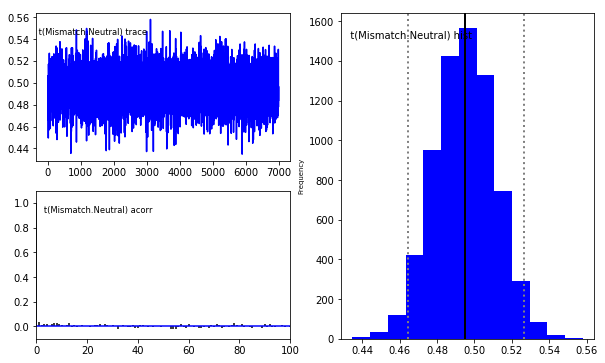

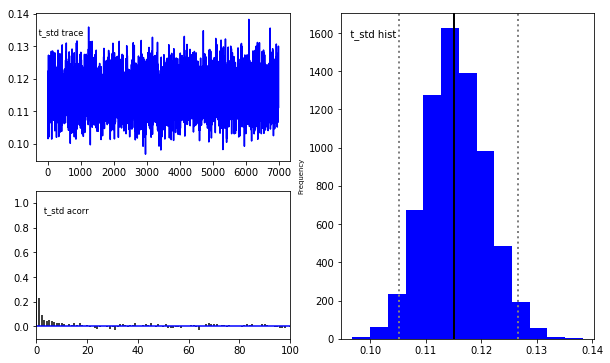

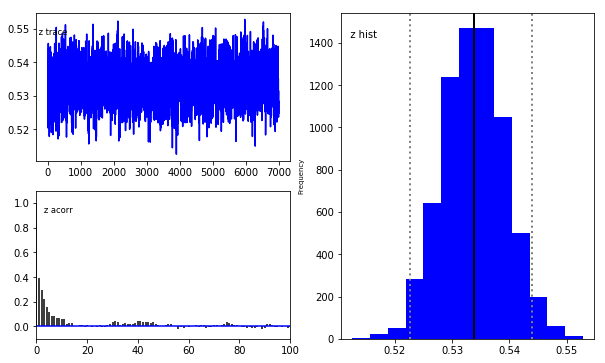

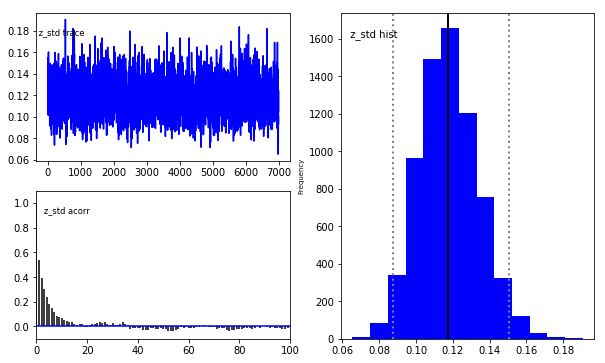

In [7]:
## check convergence of this Chain
M_df1b_v_corr.plot_posteriors()

#### Model 2: free v and z

In [8]:
start_time = time.time()  # the start time of the processing
 
import warnings           # suppress the warnings
warnings.simplefilter('ignore')

dbname = "M_match_vz_s_"
M_match_vz_s = hddm.HDDMStimCoding(dat_M_match, 
                                   include='z', 
                                   stim_col='stim',
                                   depends_on = {'v':['match','val','id']},
                                   split_param='v',
                                   drift_criterion=False)

M_match_vz_s.find_starting_values()
M_match_vz_s.sample(nsample, burn = nburn, dbname=dbname + '.db', db='pickle')
M_match_vz_s.save(dbname)

## ppc
ppc_data_match_vz_s = hddm.utils.post_pred_gen(M_match_vz_s)
ppc_compare_match_vz_s = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_vz_s)  # MSE 
ppc_compare_match_vz_s.to_csv('ppc_compare_Categ_val_vz_s.csv', sep = ',')

#M_Categ_vt.plot_posterior_predictive()
# M_Categ_vt.plot_posterior_quantiles()

## DIC
print("M_match_vz_s DIC: %f" % M_match_vz_s.dic) #  -14603.634512

## print the time used for modelling
m1_time = time.time() # the start time of the processing
print("Running M2 used: %f " % (m1_time - start_time))

 [-----------------100%-----------------] 339 of 336 complete in 5020.7 sec secM_match_vz_s DIC: 5590.032982
Running M2 used: 10142.886824 


Plotting a
Plotting a_std
Plotting v(Other.match.Bad)
Plotting v(Other.match.Good)
Plotting v(Other.mismatch.Bad)
Plotting v(Other.mismatch.Good)
Plotting v(Self.match.Bad)
Plotting v(Self.match.Good)
Plotting v(Self.mismatch.Bad)
Plotting v(Self.mismatch.Good)
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std


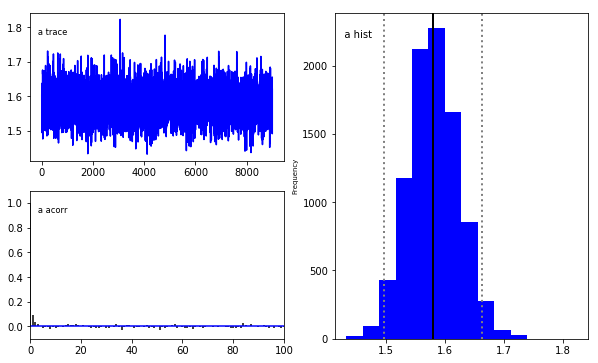

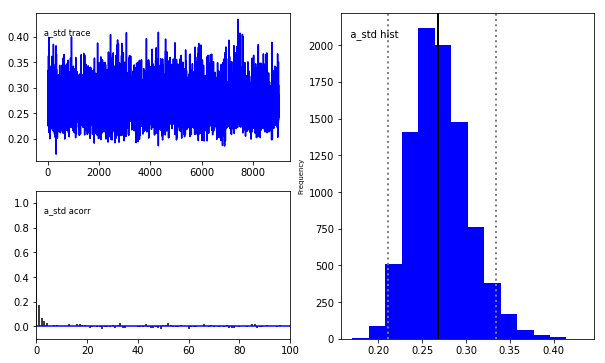

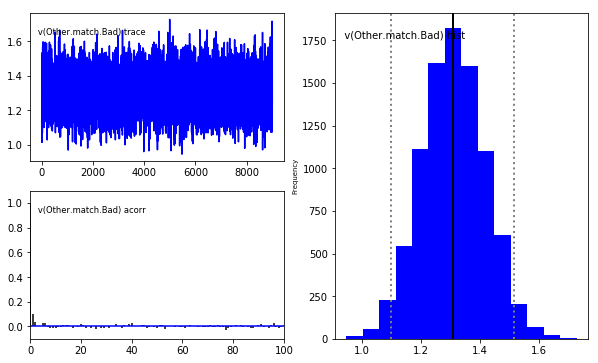

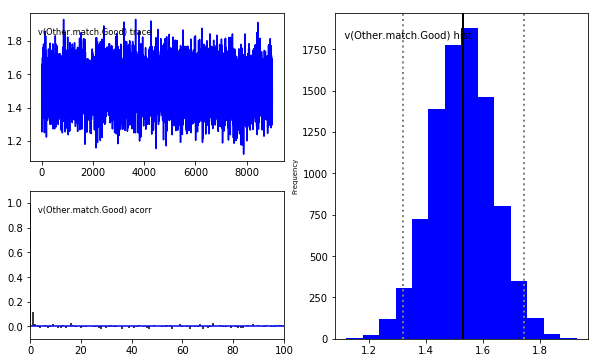

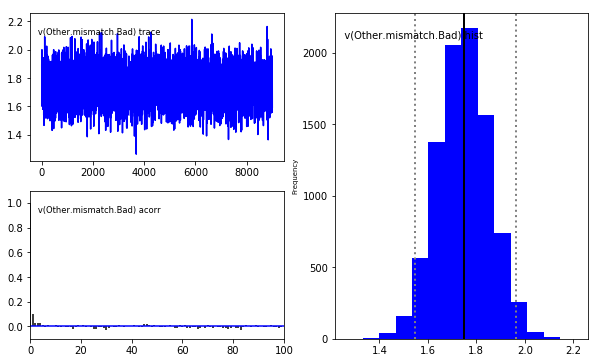

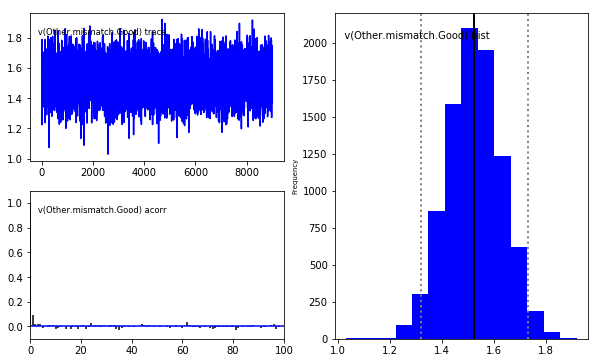

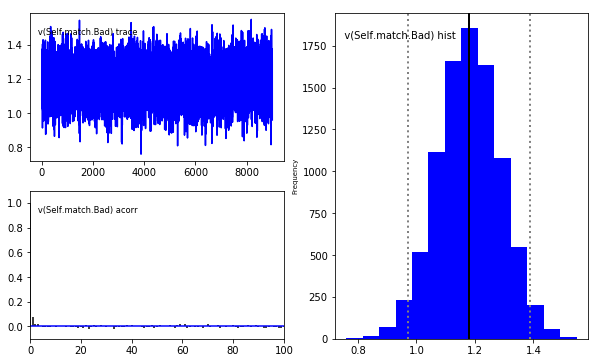

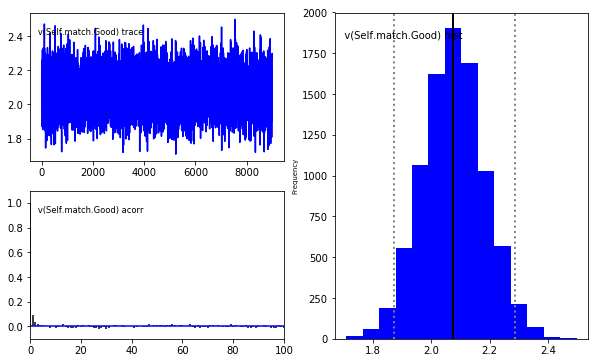

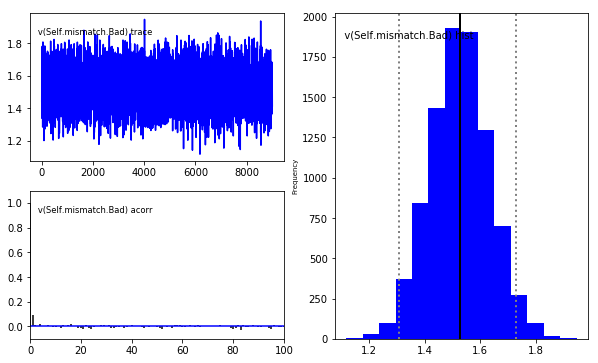

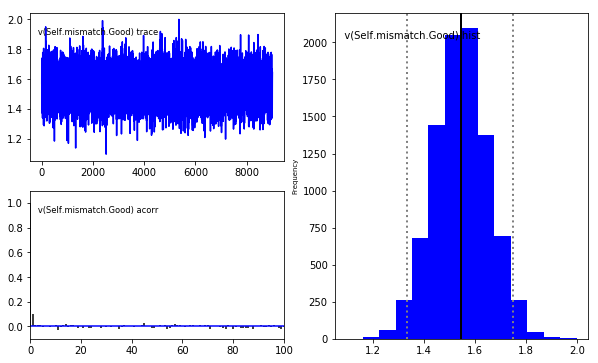

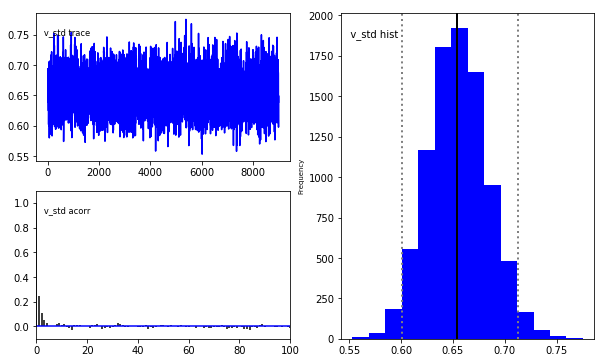

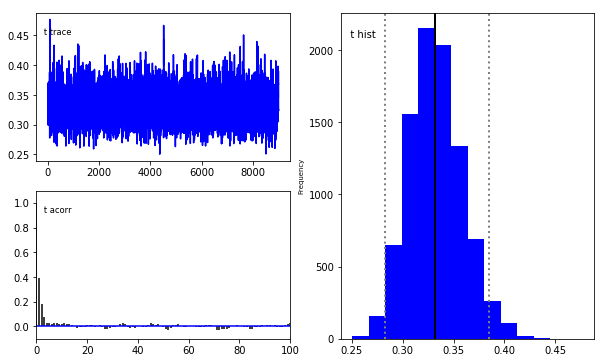

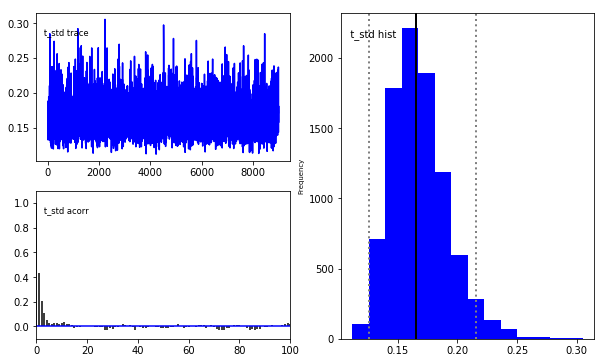

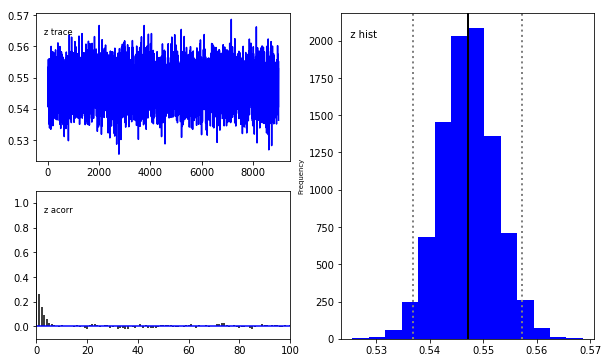

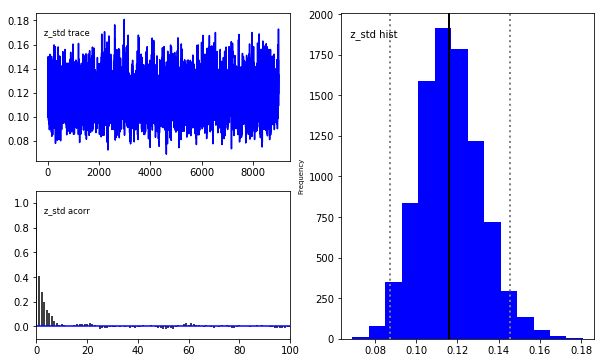

In [9]:
## check convergence of this Chain
M_match_vz_s.plot_posteriors()

#### Get results, plot the posteriors, and compare the posteriors.

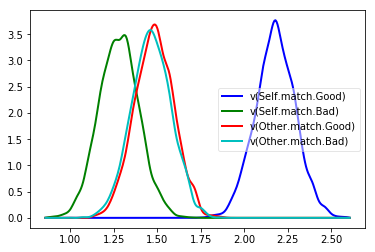

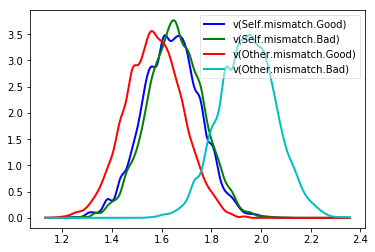

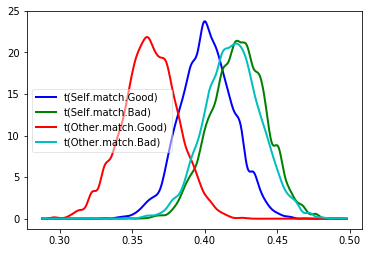

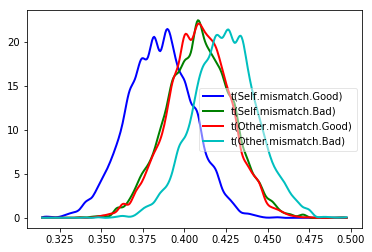

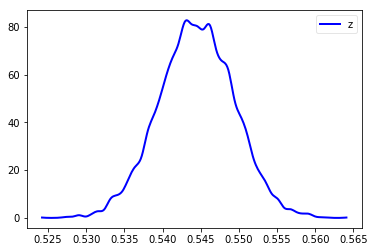

In [10]:
## drift rate
v_GoodSelf_val,v_BadSelf_val, v_GoodOther_val, v_BadOther_val, v_GoodSelf_val_nm,v_BadSelf_val_nm, v_GoodOther_val_nm, v_BadOther_val_nm  = M_match_vtz_s.nodes_db.node[['v(Self.match.Good)',
'v(Self.match.Bad)','v(Other.match.Good)','v(Other.match.Bad)','v(Self.mismatch.Good)','v(Self.mismatch.Bad)','v(Other.mismatch.Good)','v(Other.mismatch.Bad)']]
hddm.analyze.plot_posterior_nodes([v_GoodSelf_val,v_BadSelf_val, v_GoodOther_val, v_BadOther_val])
plt.savefig('ex7_rep_match_vtz_s_v3_m.pdf')

hddm.analyze.plot_posterior_nodes([v_GoodSelf_val_nm,v_BadSelf_val_nm, v_GoodOther_val_nm, v_BadOther_val_nm])
plt.savefig('ex7_rep_match_vtz_s_v3_nm.pdf')

## non-decision time
t_GoodSelf_val,t_BadSelf_val, t_GoodOther_val, t_BadOther_val, t_GoodSelf_val_nm,t_BadSelf_val_nm, t_GoodOther_val_nm, t_BadOther_val_nm  = M_match_vtz_s.nodes_db.node[['t(Self.match.Good)',
't(Self.match.Bad)','t(Other.match.Good)','t(Other.match.Bad)','t(Self.mismatch.Good)','t(Self.mismatch.Bad)','t(Other.mismatch.Good)','t(Other.mismatch.Bad)']]
hddm.analyze.plot_posterior_nodes([t_GoodSelf_val,t_BadSelf_val, t_GoodOther_val, t_BadOther_val])
plt.savefig('ex7_rep_match_vtz_s_t_3_m.pdf')

hddm.analyze.plot_posterior_nodes([t_GoodSelf_val_nm,t_BadSelf_val_nm, t_GoodOther_val_nm, t_BadOther_val_nm])
plt.savefig('ex7_rep_match_vtz_s_t_3_nm.pdf')

## starting point
z_m = M_match_vtz_s.nodes_db.node['z']
hddm.analyze.plot_posterior_nodes([z_m])
plt.savefig('ex7_rep_match_vtz_z_match_plot.pdf')

In [11]:
## uncomment the code below to plot and save the posterior predictions for each subject.
# M_match_vtz_s.plot_posterior_predictive()
# plt.savefig('ex7_rep_match_z_s_pp_plot.pdf')

In [12]:
## using absolute value for "bad" conditions 
print("P(v_M_GoodSelf  > v_M_BadSelf)    = ", (v_GoodSelf_val.trace()  > v_BadSelf_val.trace()).mean())      # 1
print("P(v_M_GoodOther > v_M_BadOther)   = ", (v_GoodOther_val.trace() > v_BadOther_val.trace()).mean())     # 0.5334
print("P(v_M_GoodSelf  > v_M_GoodOther)  = ", (v_GoodSelf_val.trace()  > v_GoodOther_val.trace()).mean())    # 1
print("P(v_M_BadSelf   > v_M_BadOther)   = ", (v_BadSelf_val.trace()   > v_BadOther_val.trace()).mean())     # 0.1227
print("P(v_M_GoodSelf  > v_NM_BadSOther) = ", (v_GoodSelf_val.trace()  > v_BadOther_val_nm.trace()).mean())  # 0.917 

# using absolute value for "bad" conditions 
print("P(t_M_GoodSelf  > t_M_BadSelf)   = ", (t_GoodSelf_val.trace()  > t_BadSelf_val.trace()).mean())       # 0.9984
print("P(t_M_GoodOther > t_M_BadOther)  = ", (t_GoodOther_val.trace() > t_BadOther_val.trace()).mean())      # 0.081
print("P(t_M_GoodSelf  > t_M_GoodOther) = ", (t_GoodSelf_val.trace()  > t_GoodOther_val.trace()).mean())     # 0.995
print("P(t_M_BadSelf   > t_M_BadOther)  = ", (t_BadSelf_val.trace()   > t_BadOther_val.trace()).mean())      # 0.037

print("P(z > 0.05) = ", (z_m.trace() > 0.5).mean()) # 1.0

P(v_M_GoodSelf  > v_M_BadSelf)    =  1.0
P(v_M_GoodOther > v_M_BadOther)   =  0.543111111111
P(v_M_GoodSelf  > v_M_GoodOther)  =  1.0
P(v_M_BadSelf   > v_M_BadOther)   =  0.125111111111
P(v_M_GoodSelf  > v_NM_BadSOther) =  0.922222222222
P(t_M_GoodSelf  > t_M_BadSelf)   =  0.209222222222
P(t_M_GoodOther > t_M_BadOther)  =  0.0156666666667
P(t_M_GoodSelf  > t_M_GoodOther) =  0.933222222222
P(t_M_BadSelf   > t_M_BadOther)  =  0.557111111111
P(z > 0.05) =  1.0


#### Check the convergence of MCMC

In [13]:
# doing Gelman-Rubin statistic (time consuming)
models_match = []
for i in range(4):
    print('processing Model ', i, '\n')
    m_stim = hddm.HDDMStimCoding(dat_M_match,
                                 include='z', 
                                 stim_col='stim',
                                 depends_on={'v':['match','val','id'], 't':['match','val','id']},
                                 split_param='v',
                                 drift_criterion=False)
    
    m_stim.find_starting_values()
    m_stim.sample(nsample, burn = nburn)
    models_match.append(m_stim)

Match_R_hat_vtz = hddm.analyze.gelman_rubin(models_match)

# save Categ_R_hat_vtz
with open('Match_R_hat_vtz_stim.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Match_R_hat_vtz.items())
    

processing Model  0 

 [-----------------100%-----------------] 10000 of 10000 complete in 7675.3 secprocessing Model  1 

 [-----------------100%-----------------] 10001 of 10000 complete in 5966.8 secprocessing Model  2 

 [-----------------100%-----------------] 10001 of 10000 complete in 6437.5 secprocessing Model  3 

 [-----------------100%-----------------] 10001 of 10000 complete in 6151.6 sec